In [271]:
import pandas as pd
#update paths in order to have access to files from src folder
df_crypto = pd.read_csv("input/consolidated_coin_data.csv")
df_gold = pd.read_csv("output/gold_quotes_historical.csv")
df_stocks = pd.read_csv("output/companies_stock_price.csv")

df_crypto.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,ripple,"Apr 24, 2019",0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293"
1,ripple,"Apr 23, 2019",0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875"
2,ripple,"Apr 22, 2019",0.322277,0.329350,0.320237,0.323934,"1,131,094,080","13,606,823,301"
3,ripple,"Apr 21, 2019",0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430"
4,ripple,"Apr 20, 2019",0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592"


In [272]:
df_crypto["Currency"].unique()
dropping = ["Open", "High", "Low", "Volume"]
df_crypto = df_crypto.drop(dropping, axis=1)

In [273]:
df_crypto = df_crypto.pivot(index="Date", columns = "Currency", values= "Close")
# df_crypto.sort_index(ascending=False, inplace=True)
# df_crypto.columns = df_crypto.columns.droplevel()
df_crypto.columns = ['Binance-coin', 'Bitcoin', 'Bitcoin-cash', 'Cardano', 'EOS', 'Ethereum',
       'Litecoin', 'Ripple', 'Stellar', 'Tether']


In [274]:
df_crypto.index= pd.to_datetime(df_crypto.index)
df_crypto.sort_index(ascending=False, inplace=True)
dropping = ['Stellar', 'Tether', 'Binance-coin','EOS']
df_crypto = df_crypto.drop(dropping, axis=1)
df_crypto = df_crypto.loc[df_crypto.index >= '2014-01-01']
df_crypto

,Bitcoin,Bitcoin-cash,Cardano,Ethereum,Litecoin,Ripple
Date,,,,,,
2019-04-24,5464.87,278.94,0.072645,165.83,73.31,0.302318
2019-04-23,5572.36,291.17,0.074524,171.45,74.85,0.321222
2019-04-22,5399.37,292.81,0.078040,171.87,76.95,0.323934
2019-04-21,5314.53,290.48,0.074106,170.05,77.33,0.322449
2019-04-20,5337.89,300.75,0.076506,173.75,81.51,0.328476
...,...,...,...,...,...,...
2014-01-05,933.53,NaN,NaN,NaN,26.83,0.025230
2014-01-04,859.51,NaN,NaN,NaN,25.11,0.028129
2014-01-03,818.72,NaN,NaN,NaN,24.82,0.027627


In [275]:
null_cols = df_crypto.isnull().sum()
null_cols[null_cols > 0]

Bitcoin-cash    1299
Cardano         1369
Ethereum         583
dtype: int64

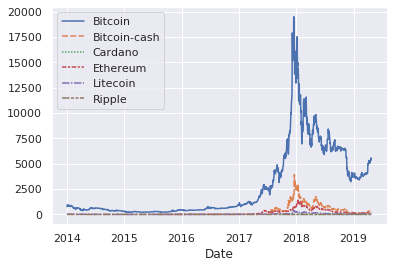

In [276]:
import seaborn as sns
sns.lineplot(data=df_crypto)

In [277]:
df_gold.set_index('Date', inplace=True)
df_gold.rename(columns = {"Quote": "Gold"}, inplace=True)


In [278]:
df_stocks.set_index('date', inplace=True)
df_stocks.index.names = ['Date']
df_stocks

,Amazon.com Inc.,Baidu Inc.,Apple Inc.,Alibaba Group Holding Limited,Facebook Inc.,Twitter Inc.
Date,,,,,,
2019-11-08,1783.1,124.5,259.8,187.1,190.6,29.2
2019-11-07,1784.4,122.0,259.1,186.6,190.2,29.0
2019-11-06,1794.5,107.3,257.0,184.0,191.4,29.5
2019-11-05,1802.2,108.2,257.0,181.7,194.3,29.8
2019-11-04,1804.4,109.5,257.3,179.9,194.5,30.0
...,...,...,...,...,...,...
2014-06-19,327.0,174.4,84.2,NaN,64.3,38.9
2014-06-18,334.4,176.7,84.5,NaN,65.6,38.7
2014-06-17,325.6,178.2,84.4,NaN,64.4,38.0


In [282]:
df_final = df_stocks.join(df_gold).join(df_crypto)
df_final = df_final.loc[df_final.index < '2019-04-24']
df_final

,Amazon.com Inc.,Baidu Inc.,Apple Inc.,Alibaba Group Holding Limited,Facebook Inc.,Twitter Inc.,Gold,Bitcoin,Bitcoin-cash,Cardano,Ethereum,Litecoin,Ripple
Date,,,,,,,,,,,,,
2019-04-23,1923.8,173.3,206.7,187.3,183.8,39.8,1272.15,5572.36,291.17,0.074524,171.45,74.85,0.321222
2019-04-22,1887.3,169.4,203.7,185.4,181.4,34.4,1274.73,5399.37,292.81,0.078040,171.87,76.95,0.323934
2019-04-18,1861.7,171.0,203.1,186.9,178.3,34.4,1275.54,5298.39,306.96,0.081775,173.81,82.07,0.337065
2019-04-17,1864.8,170.3,202.4,187.6,178.8,34.5,1273.49,5251.94,310.80,0.083074,166.95,79.33,0.335453
2019-04-16,1863.0,170.3,198.5,185.8,178.9,34.5,1276.65,5235.56,318.31,0.083783,167.62,81.35,0.327218
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-19,327.0,174.4,84.2,NaN,64.3,38.9,1320.17,598.07,NaN,NaN,NaN,9.99,0.004230
2014-06-18,334.4,176.7,84.5,NaN,65.6,38.7,1277.59,607.96,NaN,NaN,NaN,9.68,0.004247
2014-06-17,325.6,178.2,84.4,NaN,64.4,38.0,1270.59,610.86,NaN,NaN,NaN,9.66,0.004264


In [280]:
null_cols = df_final.isnull().sum()
null_cols[null_cols > 0]

Alibaba Group Holding Limited     68
Gold                               2
Bitcoin                          141
Bitcoin-cash                     924
Cardano                          973
Ethereum                         431
Litecoin                         141
Ripple                           141
dtype: int64

In [283]:
df_final.to_csv("df_final.csv")
print("DataFrame exported")

DataFrame exported
